In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import os
from tqdm.auto import tqdm
import scipy
import freud
%matplotlib ipympl
# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
for root, dirs, files in os.walk("../data/400000"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
assert len(simlist) == len(datafiles) == len(csvfiles)


def load_csv(fname,verbose=True):
    if verbose:
        with open(fname) as f:
            print(f.readline().strip('\n'))
    return np.loadtxt(fname,skiprows=1,delimiter=",")

def plot_energy(fpath,csv1,save=False):
    fig,ax1 = plt.subplots()
    ax1.set_title(simlist[0])
    ax1.plot(csv1[:,0],csv1[:,1],label="TotalEnergy")
    ax1.set_xlabel("timesteps")
    ax1.set_ylabel("Total Energy")
    ax1.tick_params(axis ='y', labelcolor="tab:blue")
    ax2  = ax1.twinx()
    ax2.plot(csv1[:,0],csv1[:,2],label="Eexcess",color="tab:orange")
    ax2.set_ylabel("Ent. Excess")
    ax2.tick_params(axis ='y', labelcolor = "tab:orange")
    plt.show()
    if save:
        fname = fpath[:-4]+"_energy.png"
        print(fname)
        fig.savefig(fname)

../data/400000/phasediag_alignedlong4_K3.0_kbt0.6/phasediag_alignedlong4_K3.0_kbt0.6_data.npz


[]

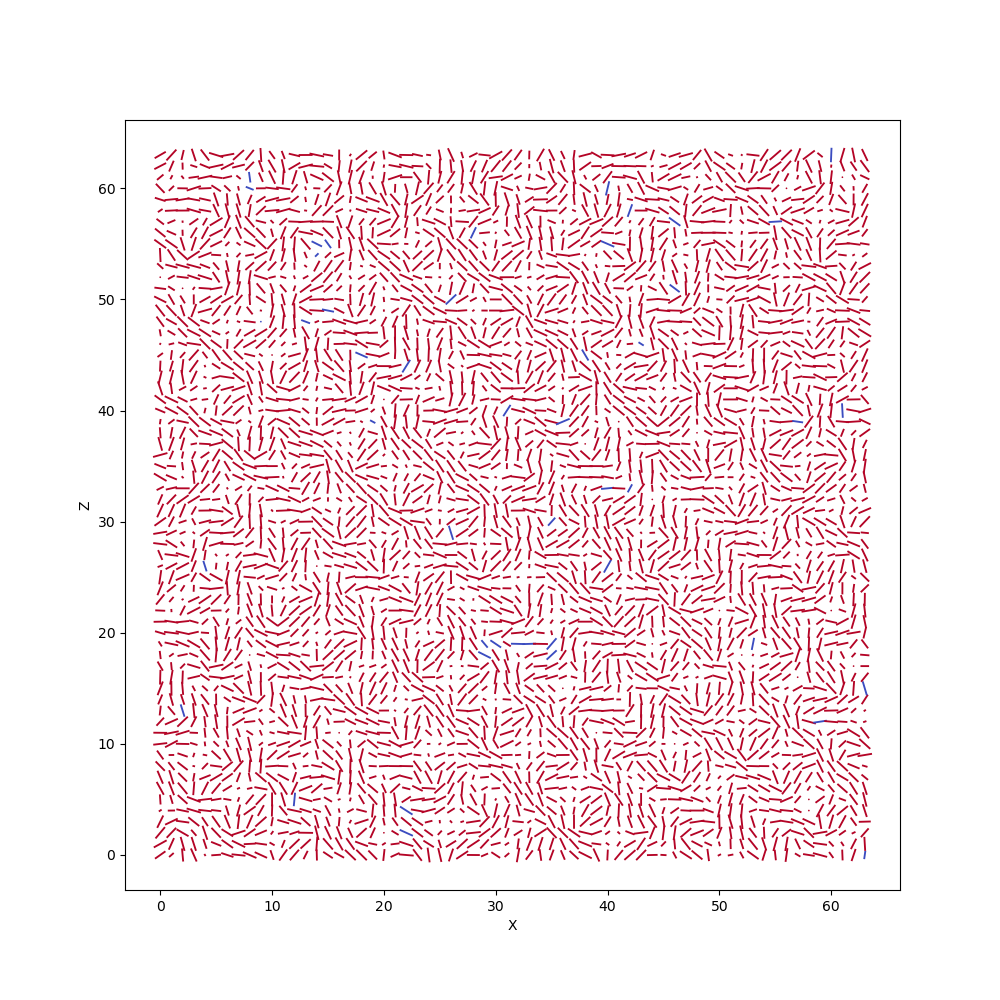

In [2]:
datafile = datafiles[371] #242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape
X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
mp = int(np.floor(nj/2))
u = data['nx'][:,mp,:]
v = data['ny'][:,mp,:]
w = data['nz'][:,mp,:]
s_color = data['s'][:,mp,:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.plot()

(0.02024073526263237, array([-0.40887013, -0.31045392,  0.85816306], dtype=float32))


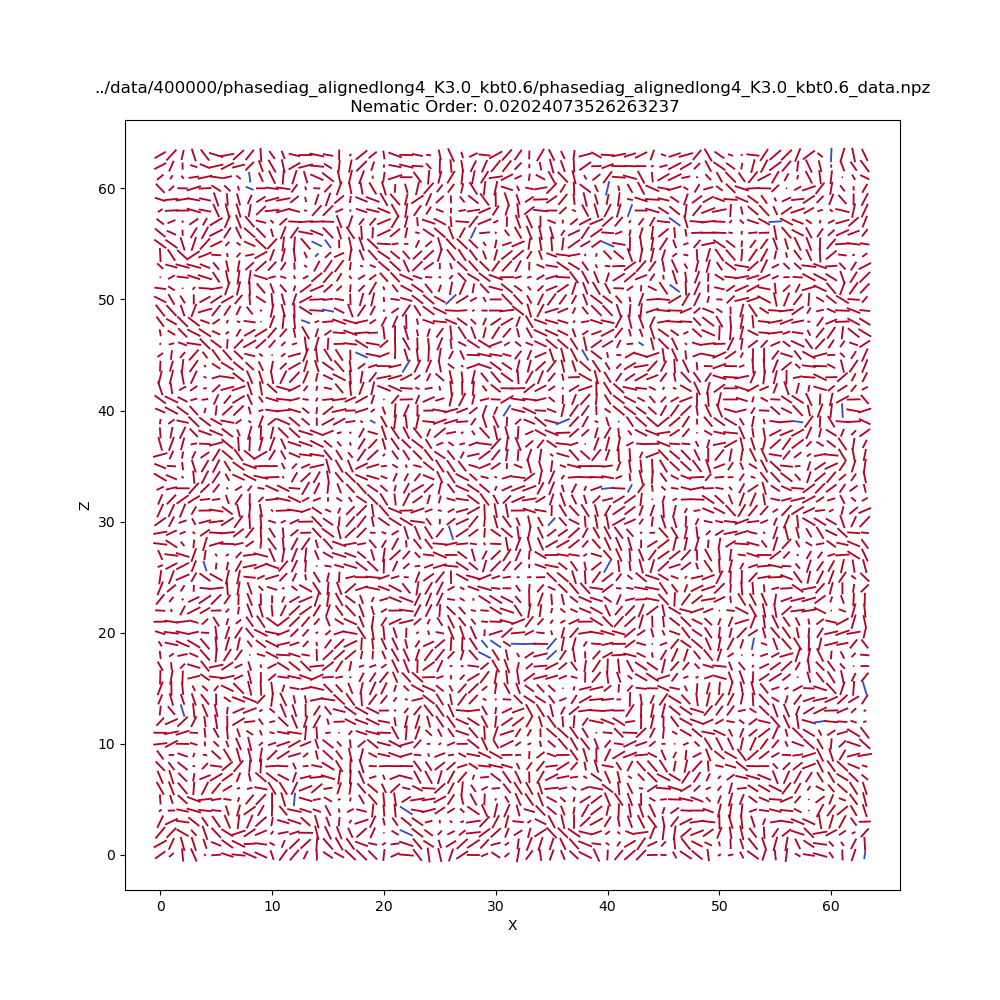

In [3]:
def get_nem_properties(datafiles,i,plot=False):
    datafile = datafiles[i] #242
    #print(datafile)
    data = np.load(datafile)
    nx = data['nx']
    ny = data['ny']
    nz = data['nz']
    orientations = np.vstack((nx.flatten(),ny.flatten(),nz.flatten())).T
    nematic = freud.order.Nematic()
    nematic.compute(orientations)
    if plot:
        ni,nj,nk = data['nx'].shape
        X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
        mp = int(np.floor(nj/2))
        u = data['nx'][:,mp,:]
        v = data['ny'][:,mp,:]
        w = data['nz'][:,mp,:]
        s_color = data['s'][:,mp,:]
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        ax.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
        ax.set_title(datafile+"\n Nematic Order: "+str(nematic.order))
        ax.set_xlabel('X')
        ax.set_ylabel('Z')
        plt.plot()
    return (nematic.order,nematic.director)

res = get_nem_properties(datafiles,371,plot=True)
print(res)

In [4]:
Ks = []
kbts = []
for csvfile in csvfiles:
    csv1 = load_csv(csvfile,verbose=False)
    K = float(csvfile.split("/")[3].split("_")[-2][1:])
    kbt = float(csvfile.split("/")[3].split("_")[-1][3:])
    Ks.append(K)
    kbts.append(kbt)
Ks = sorted(list(set(Ks))) #list of all Ks w/ duplicates removed
kbts = sorted(list(set(kbts))) # list of all Kbts w/ duplicates removed
print(Ks)
print(kbts)
ord_params = np.zeros((len(kbts),len(Ks)))
for i in tqdm(np.arange(len(datafiles))):
    K = float(datafiles[i].split("/")[3].split("_")[-2][1:])
    kbt = float(datafiles[i].split("/")[3].split("_")[-1][3:])
    res = get_nem_properties(datafiles,i,plot=False)
    K_index = Ks.index(K)
    kbt_index = kbts.index(kbt)
    ord_params[kbt_index,K_index] = res[0]

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]


  0%|          | 0/390 [00:00<?, ?it/s]

In [5]:
print(ord_params[:,0])

[0.97357059 0.95599335 0.93311083 0.90929735 0.88265735 0.85913187
 0.83149636 0.80514199 0.77486742 0.73579538 0.69261187 0.63147277
 0.55440497 0.42410481 0.16688707 0.06800459 0.04463584 0.032791
 0.03161308 0.02919825 0.03027211 0.0264549  0.02703082 0.02060693
 0.02105128 0.02202263 0.01772911 0.01861228 0.01525277 0.01479004]


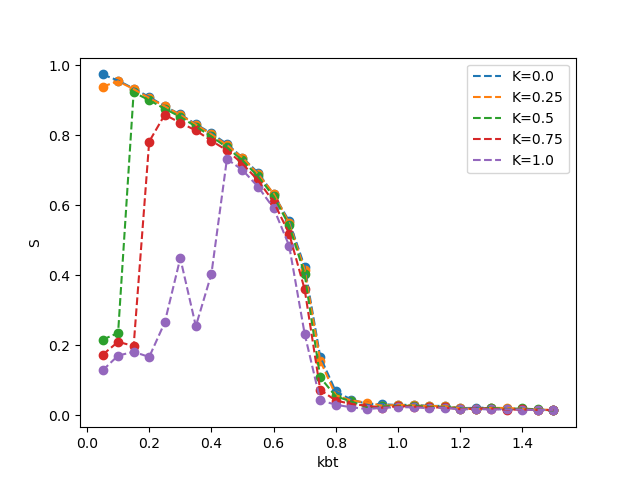

In [21]:
fig,ax = plt.subplots()
ax.set_ylabel("S")
ax.set_xlabel("kbt")
ax.scatter(kbts,ord_params[:,0])
ax.plot(kbts,ord_params[:,0],linestyle='dashed',label='K=0.0')
ax.scatter(kbts,ord_params[:,1])
ax.plot(kbts,ord_params[:,1],linestyle='dashed',label='K=0.25')
ax.scatter(kbts,ord_params[:,2])
ax.plot(kbts,ord_params[:,2],linestyle='dashed',label='K=0.5')
ax.scatter(kbts,ord_params[:,3])
ax.plot(kbts,ord_params[:,3],linestyle='dashed',label='K=0.75')
ax.scatter(kbts,ord_params[:,4])
ax.plot(kbts,ord_params[:,4],linestyle='dashed',label='K=1.0')
ax.legend()
plt.show()

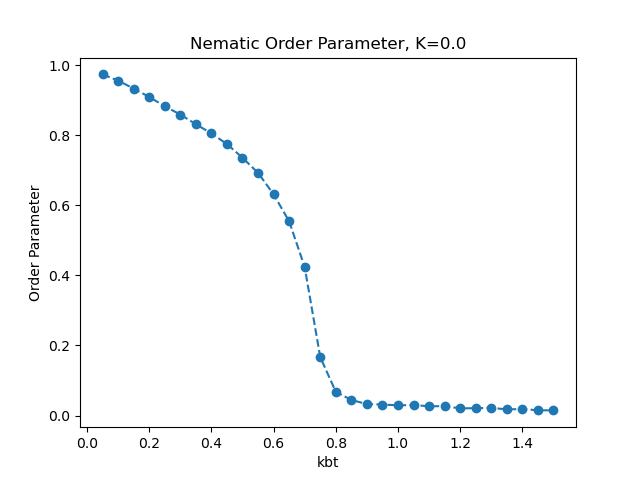

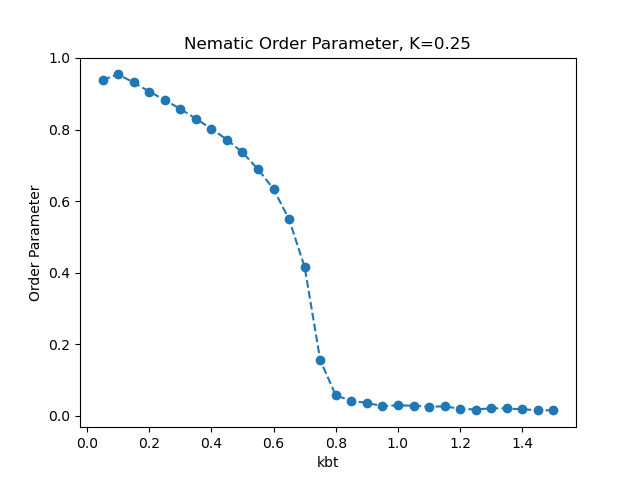

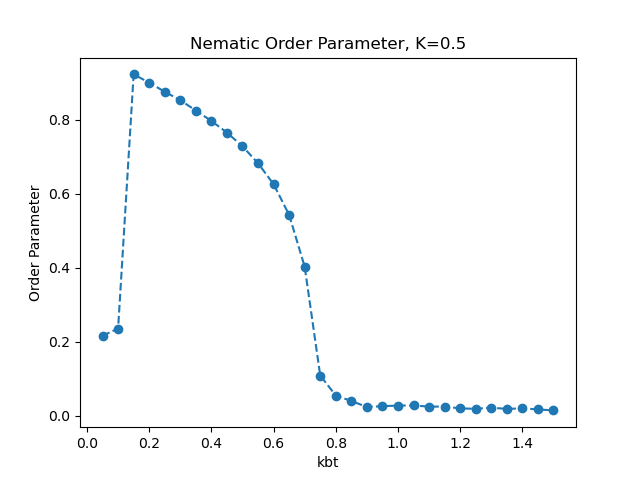

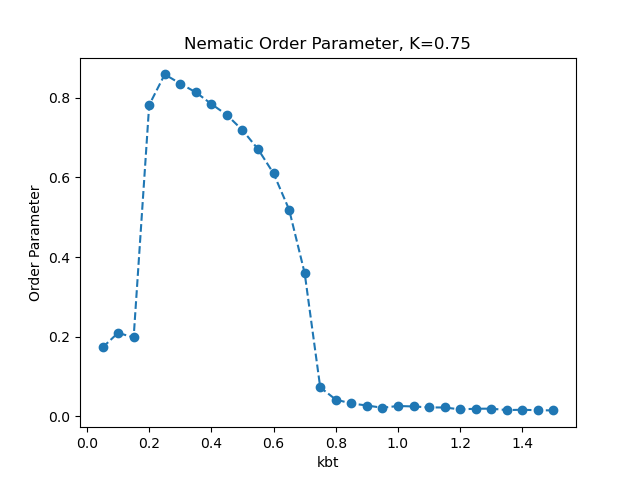

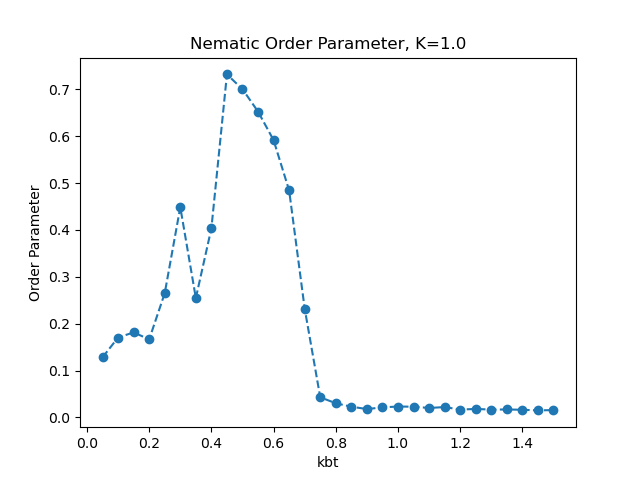

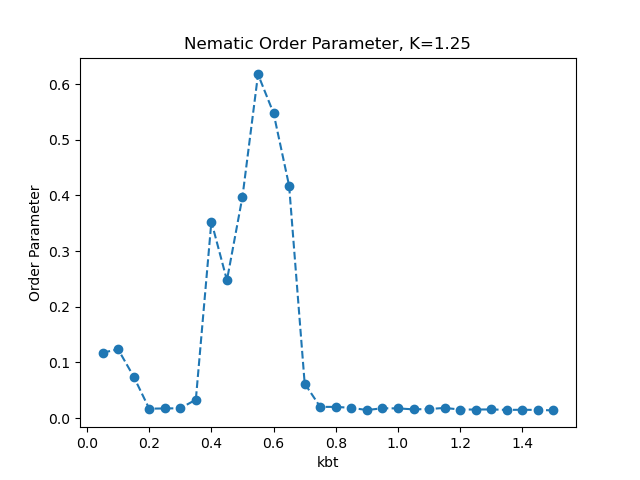

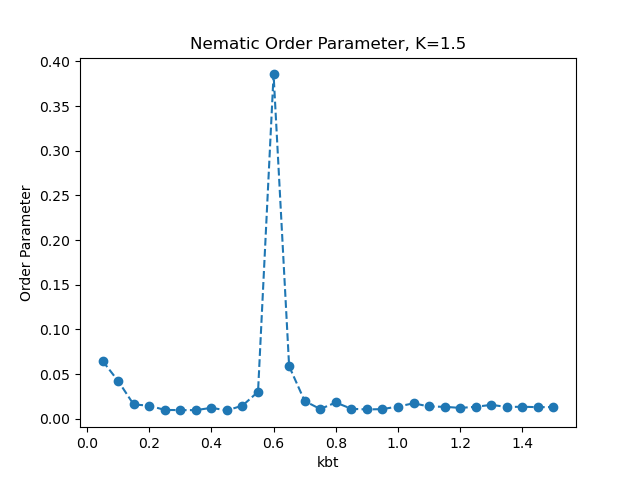

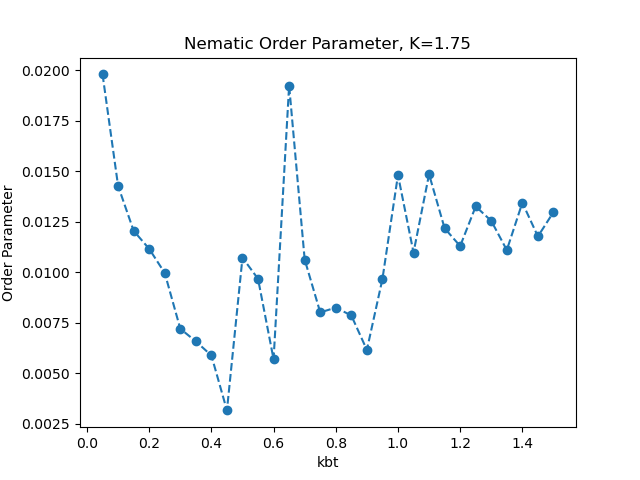

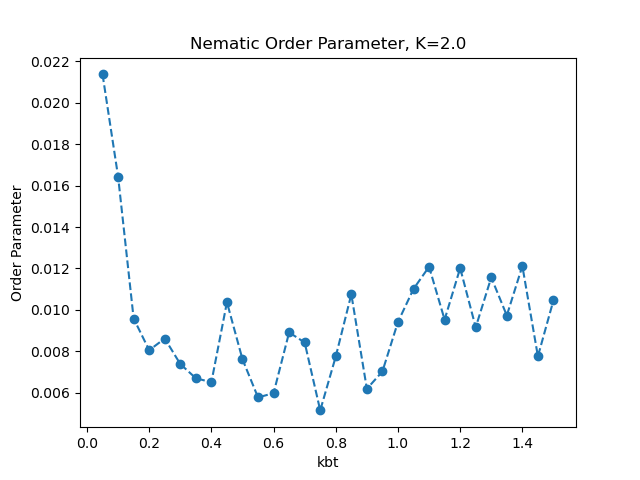

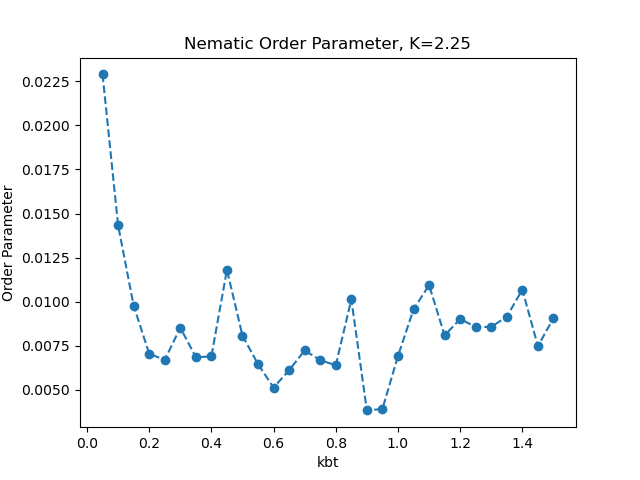

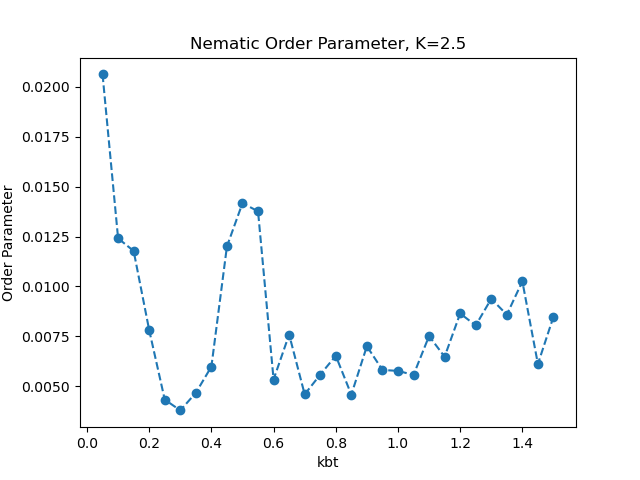

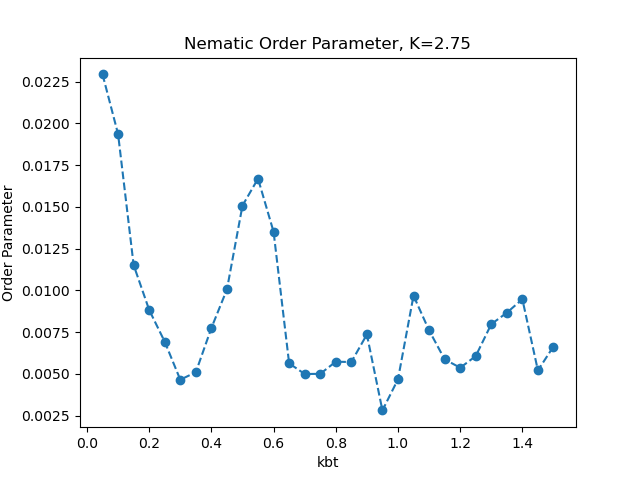

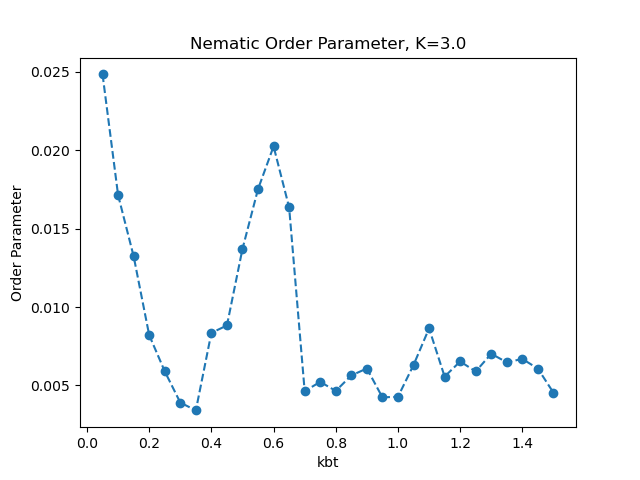

In [11]:
for i in np.arange(len(Ks)):
    fig,ax = plt.subplots()
    ax.set_title("Nematic Order Parameter, K="+str(Ks[i]))
    ax.set_ylabel("Order Parameter")
    ax.set_xlabel("kbt")
    ax.scatter(kbts,ord_params[:,i])
    ax.plot(kbts,ord_params[:,i],linestyle='dashed')
    plt.show()
    #fig.savefig("nem_order_param_K"+"{:.2f}".format(Ks[i])+".png")

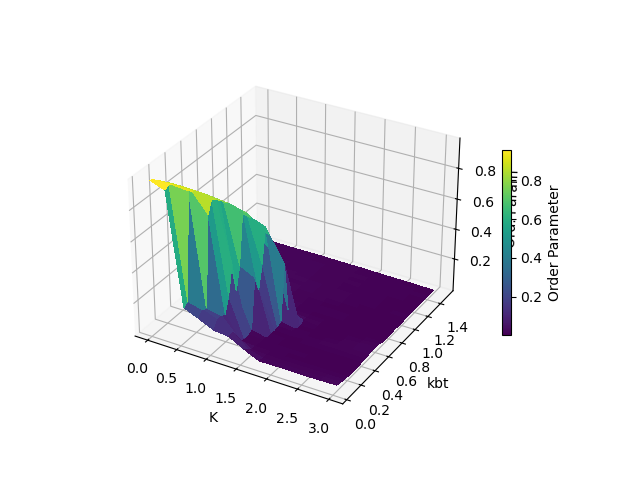

In [8]:
X,Y = np.meshgrid(Ks,kbts)
fig,ax1 = plt.subplots(subplot_kw={"projection": "3d"})
ax1.set_ylabel("kbt")
ax1.set_xlabel("K")
ax1.set_zlabel("Ord. Param")
surf1 = ax1.plot_surface(X, Y, ord_params, cmap='viridis',linewidth=0, antialiased=False)
cbar1 = plt.colorbar(surf1, ax=ax1,shrink=0.5)
cbar1.set_label('Order Parameter', rotation=90)